In [1]:
#Import Required libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import APIs for train_test_split
from sklearn.model_selection import train_test_split
#Import APIs for Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

#Import APIs for RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Import APIs for stats apis
import statsmodels.api as sm 

#Import APIs for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import APIs for r2
from sklearn.metrics import r2_score

#Import to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Step 1: Reading & Understanding the Data

In [3]:
#Read the BoomByke CSV Data file.
bbike = pd.read_csv("day.csv")

In [4]:
#view the first few lines of Data to understand.
bbike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# check Shape of the Data.
bbike.shape

(730, 16)

In [6]:
# Drop the varibales which are not required:
# 'instant' : Dropping this var as it is index and not required in analysis.
# 'dteday'  : Dropping this var as this is redundant and taken care by other params like 'season','yr', 'mnth', 'holiday','workingday',etc.
# 'casual' & 'registered' : Dropping this var as cnt is important and it is incuded in cnt and cant predict from 'casual' n 'registered' that from which
#             category people will come.
bbike = bbike.drop(['instant','dteday','casual','registered'],axis=1)

In [7]:
#Rename the columns for better readability and understanding.
bbike.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)

In [8]:
#Mapping variables season, month, weathersit, weekday

bbike['season']=bbike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bbike['month']=bbike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bbike['weathersit']=bbike.weathersit.map({1: 'Clear-PartlyCloudy',2:'Mist-Cloudy',3:'Light-Snow',4:'Rain-SnowFog'})
bbike['weekday']=bbike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [9]:
# Understandind the columns - Null check, Data Type.
bbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [10]:
bbike.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


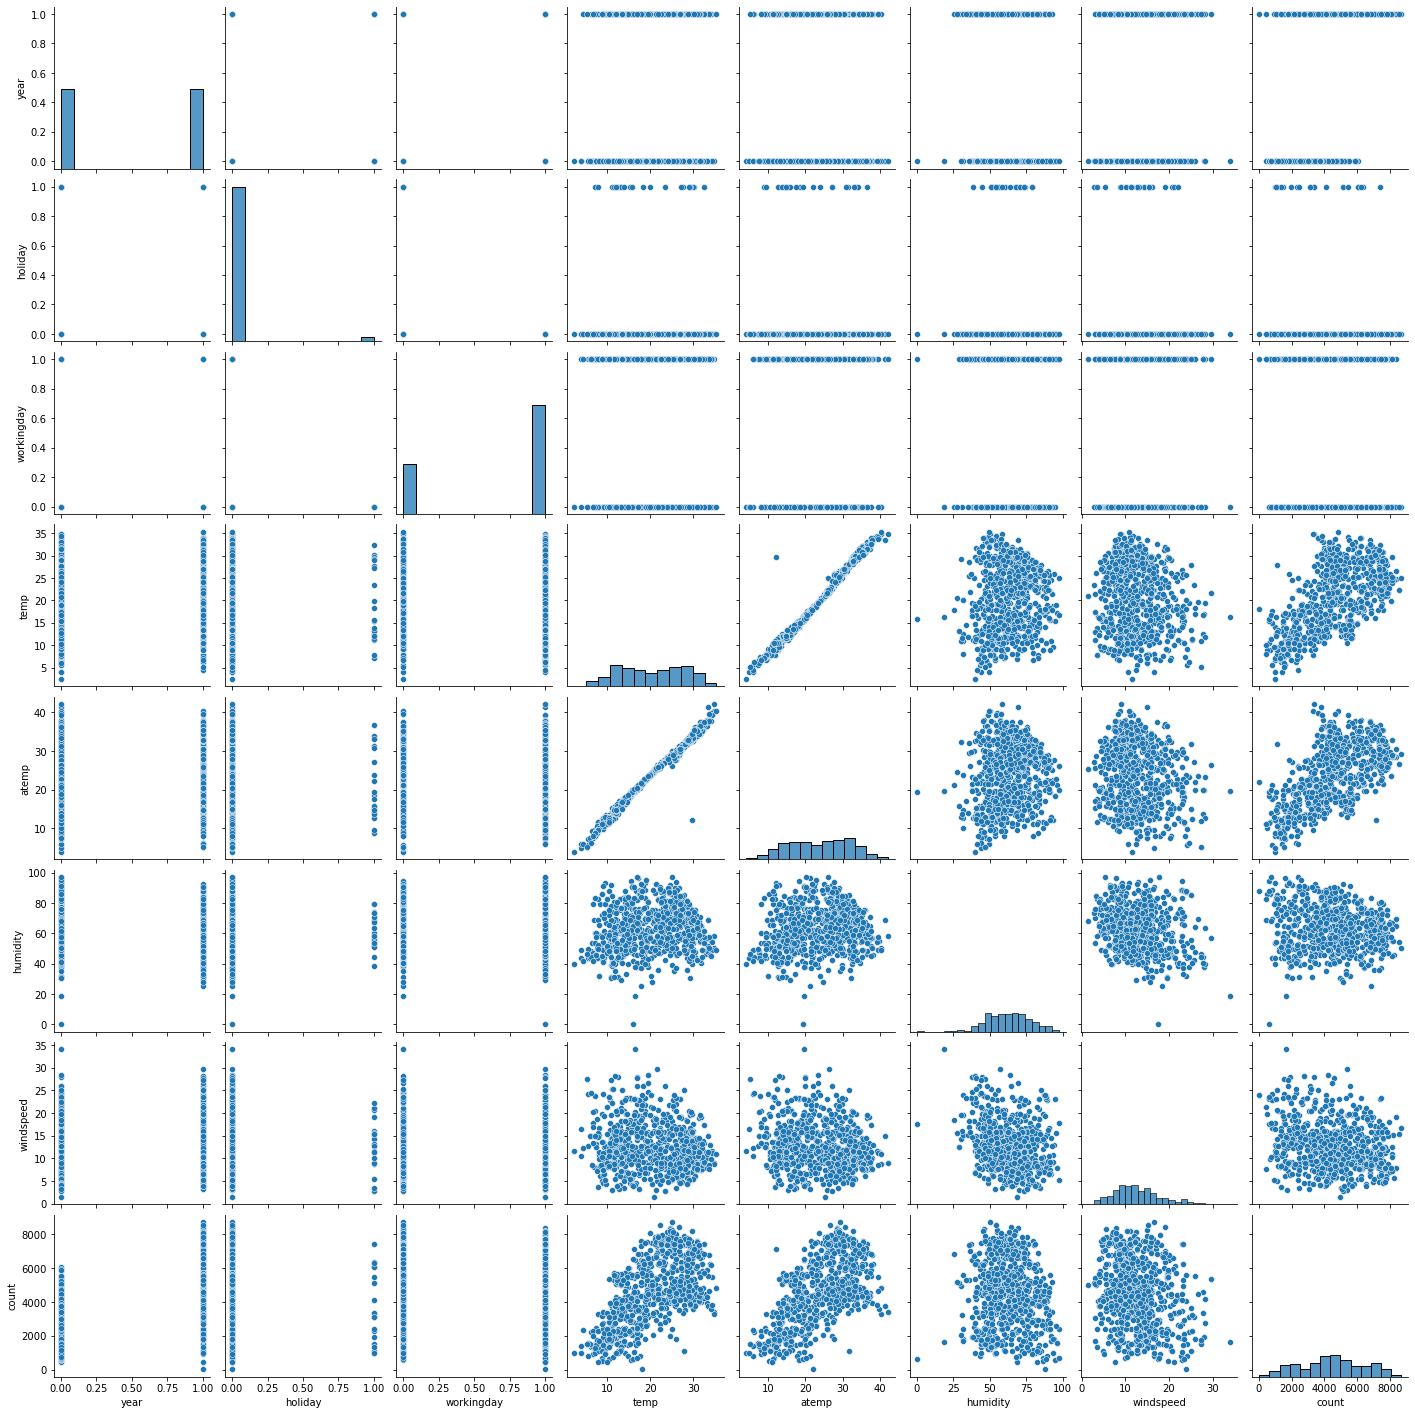

In [11]:
#Visualising the Numeric Vars:
sns.pairplot(bbike)
plt.show()

In [12]:
# Bike Rentals increases with Temperature.

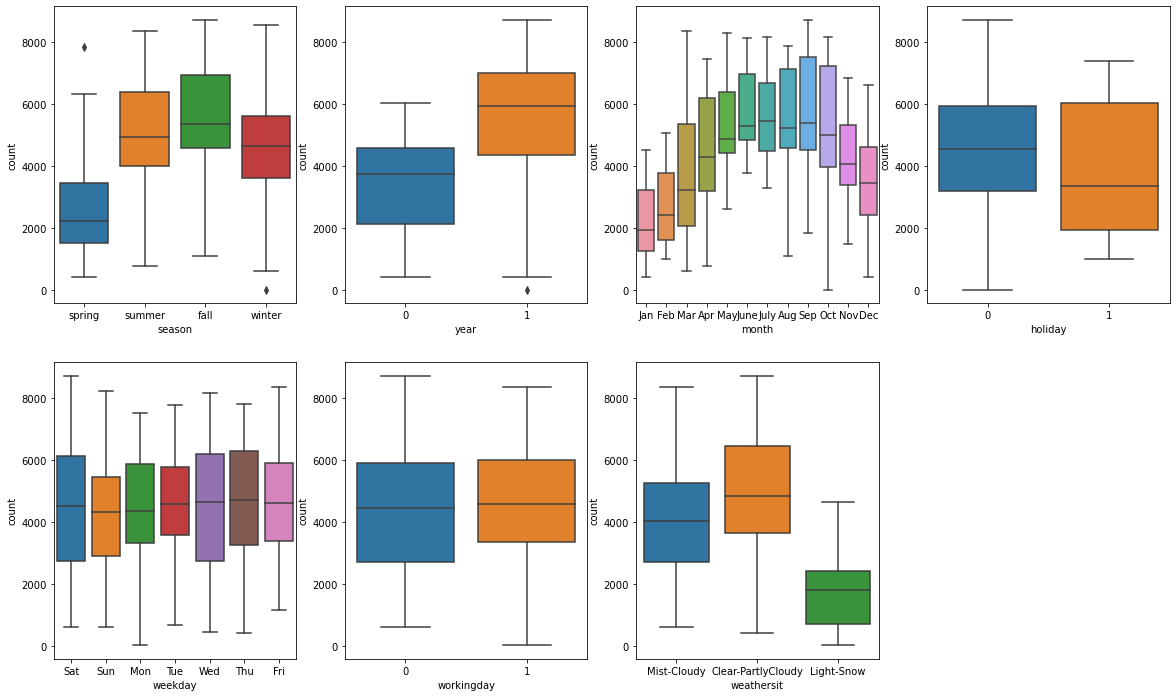

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='count', data = bbike)
plt.subplot(2,4,2)
sns.boxplot(x='year', y='count', data = bbike)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = bbike)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'count', data = bbike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = bbike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = bbike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'count', data = bbike)
plt.show()

In [14]:
#Bike Rentals are more in Fall and summer. It is highest in Fall. It is high in winter too.
#Bike Rentals are increased in year(0:2018) to year(0:2019).
#Bike Rentals are more during April to October and highest at Spetember.
#Bike Rentals are more on Saturday,wednesday and thursday.
#Bike Rentals are more in partly cloudy weather

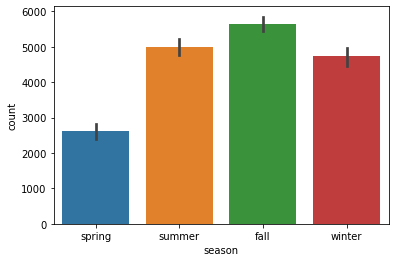

In [15]:
#Barplot to see relation between season and count of bike rentals
sns.barplot('season','count',data=bbike)
plt.show()

In [16]:
#Bike Rentals are more in Fall and summer. It is highest in Fall. It is high in winter too.

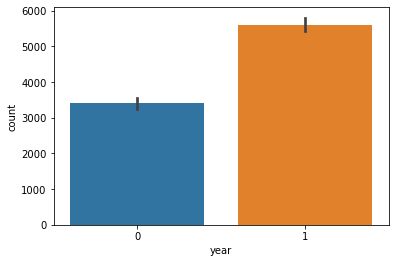

In [17]:
#Barplot to see relation between 'yr' and count of bike rentals
sns.barplot('year','count',data=bbike)
plt.show()

In [18]:
#Bike Rentals are increased in year(0:2018) to year(0:2019).

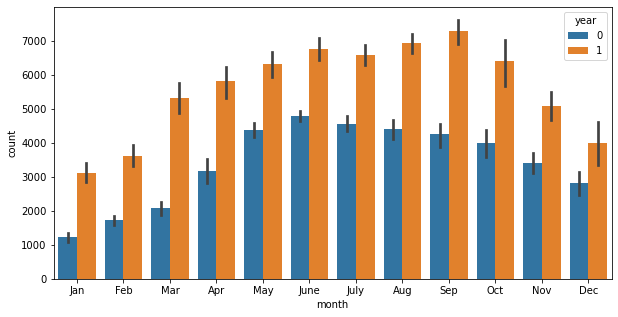

In [19]:
#Relation between month and and count of bike rentals
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=bbike)
plt.show()

In [20]:
#Bike Rentals are more in the year Sept 2019.

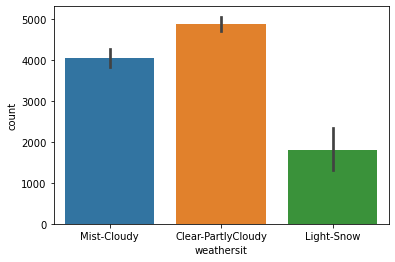

In [21]:
#Relation between weather and count of bike rentals
sns.barplot('weathersit','count',data=bbike)
plt.show()

In [22]:
#Bike Rentals are more in partly cloudy weather

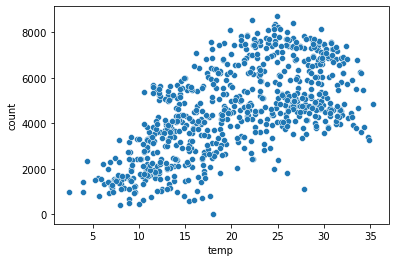

In [23]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=bbike)
plt.show()

In [24]:
#Bike Rentals are observed higher at higher temperatures

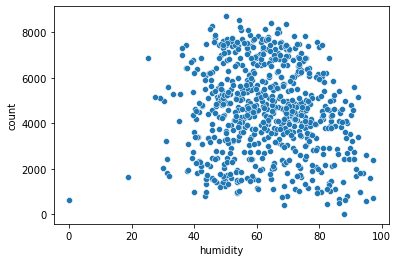

In [25]:
sns.scatterplot(x='humidity', y='count',data=bbike)
plt.show()

In [26]:
#Bike rentals more at high humidity

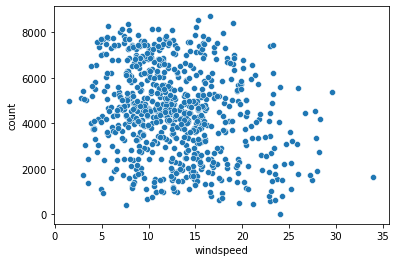

In [27]:
sns.scatterplot(x='windspeed', y='count',data=bbike)
plt.show()

In [28]:
#Bike Rentals are mote at less windspeed.

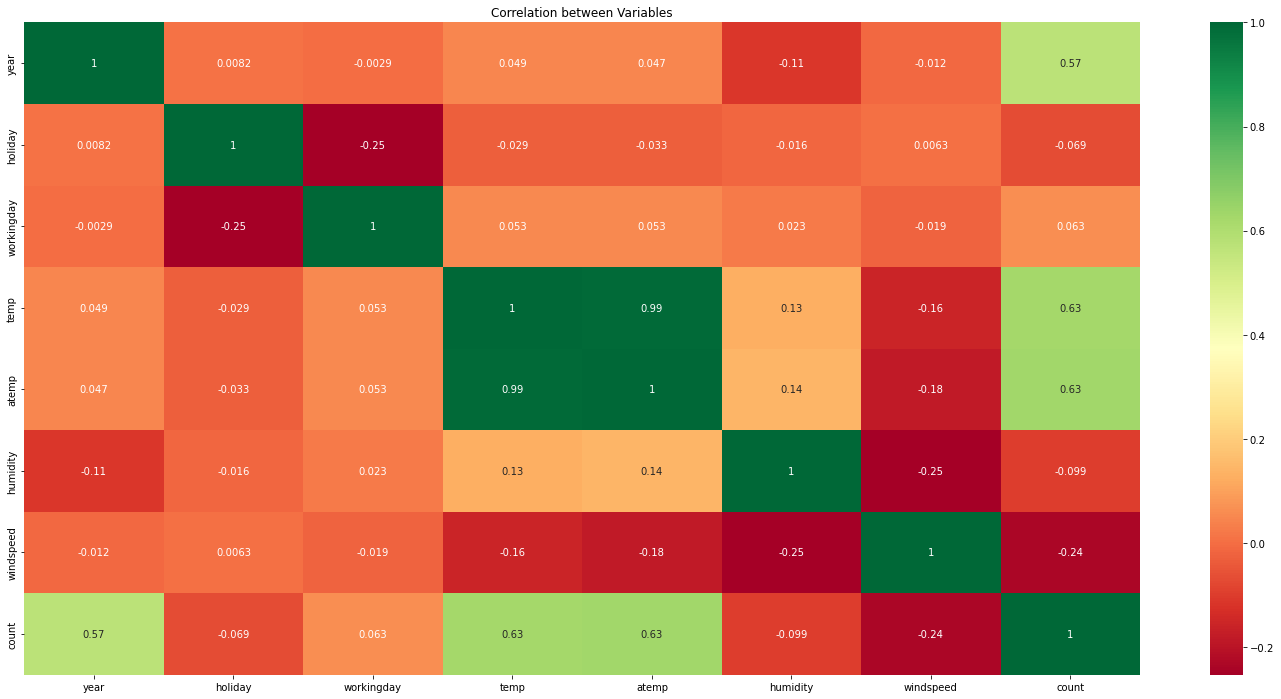

In [29]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bbike.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [30]:
#Step 2: Data Preparation

In [31]:
# Dummy variables for month, season, weathersit, weekday
months=pd.get_dummies(bbike.month,drop_first=True)
weekdays=pd.get_dummies(bbike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bbike.weathersit,drop_first=True)
seasons=pd.get_dummies(bbike.season,drop_first=True)

# Add the Dummy variables to the original bike dataframe
bbike=pd.concat([bbike,months,weekdays,weather_sit,seasons],axis=1)
bbike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Sat,Sun,Thu,Tue,Wed,Light-Snow,Mist-Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist-Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist-Cloudy,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear-PartlyCloudy,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear-PartlyCloudy,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear-PartlyCloudy,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [32]:
# Dropping 'season','month','weekday','weathersit' as they are addressed in dummy variables.
bbike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bbike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light-Snow,Mist-Cloudy,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


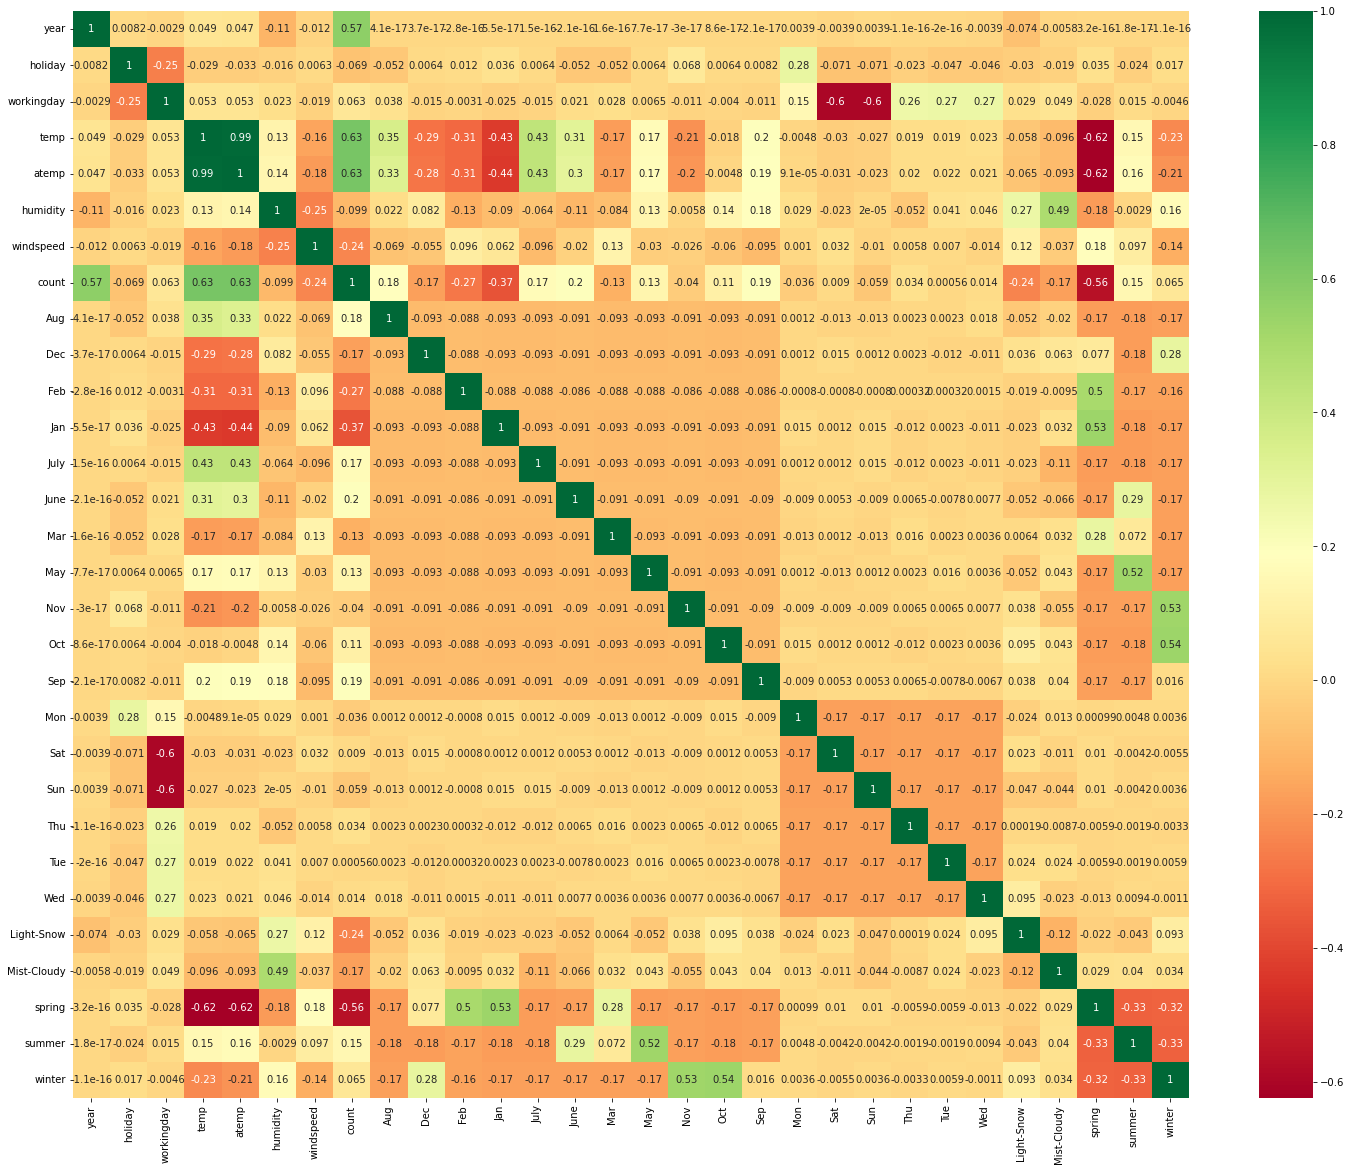

In [33]:
#checking correlation between variables again using HeatMap
plt.figure(figsize=(25, 20))
sns.heatmap(bbike.corr(), cmap='RdYlGn',annot = True)
plt.show()

In [34]:
#Step 3: Splitting the Data into Training and Testing Sets

In [35]:
# Splitting the Data : Traning:70%, Test:30%
bbike_train, bbike_test = train_test_split(bbike, train_size = 0.7, random_state = 100)

In [36]:
print(bbike_train.shape)
print(bbike_test.shape)

(510, 30)
(220, 30)


In [37]:
#Min-Max scaling for normalization
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bbike_train[num_vars] = scaler.fit_transform(bbike_train[num_vars])
bbike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light-Snow,Mist-Cloudy,spring,summer,winter
576,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,11.5850,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,16.0977,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [38]:
#Checking numeric variables(min and max) after scaling
bbike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light-Snow,Mist-Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,23.500287,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,8.090963,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,24.131150,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
#Step 4 : Traning the Model

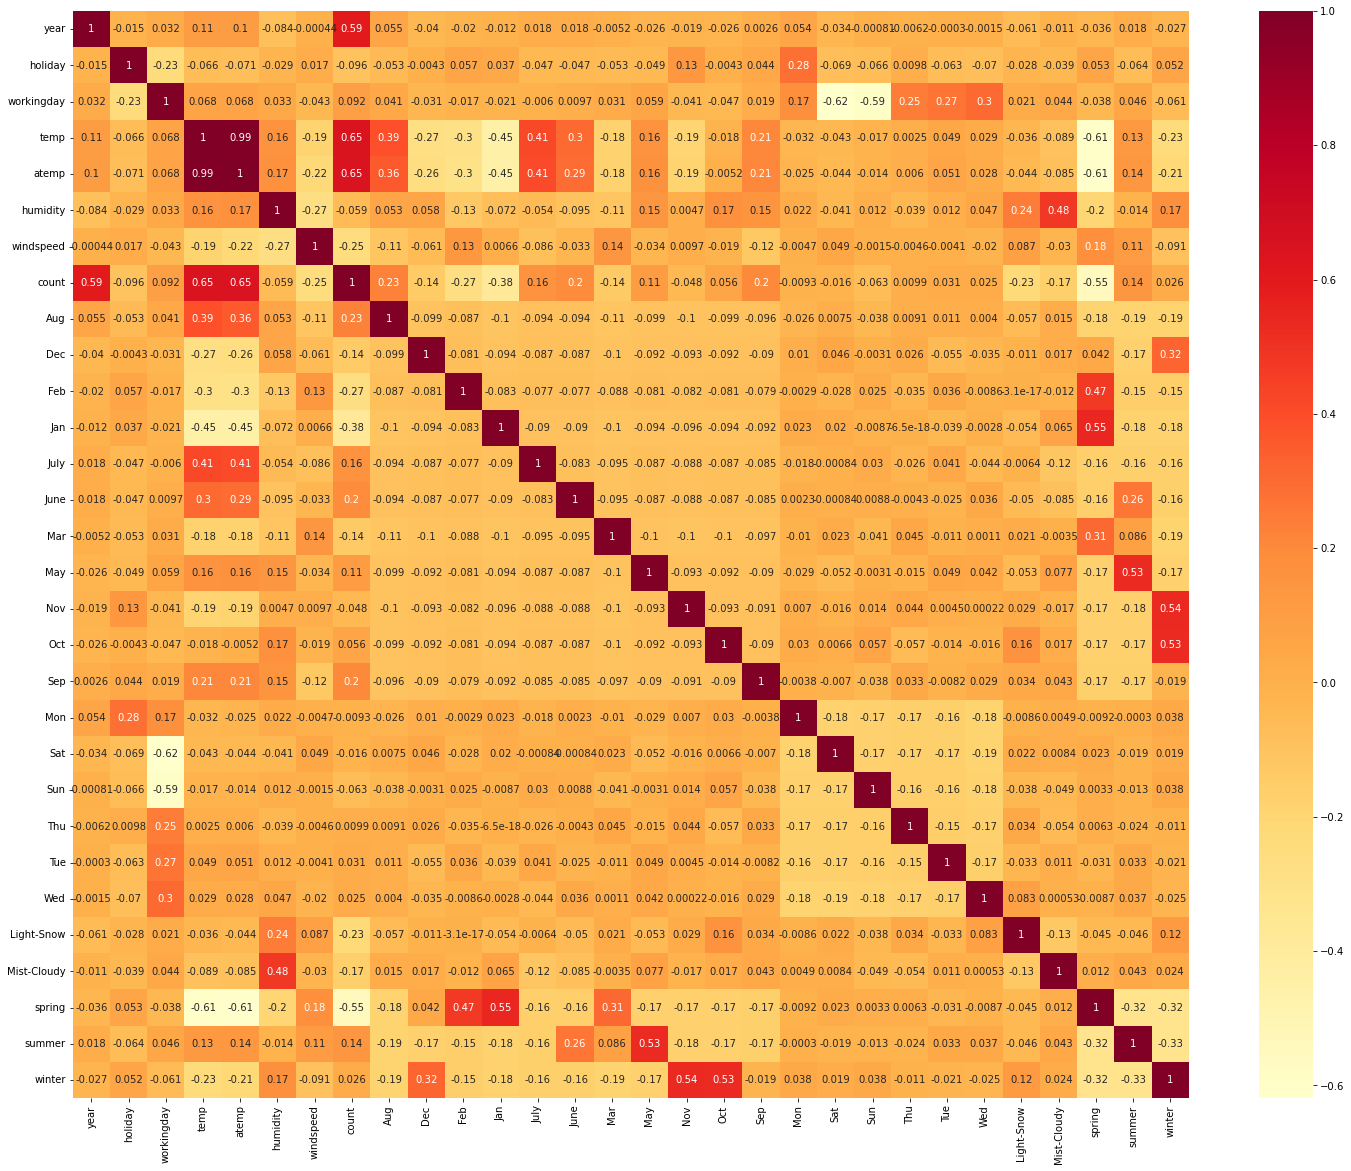

In [40]:
# Checking multicollinearity

plt.figure(figsize=(25, 20))
sns.heatmap(bbike_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

In [41]:
#from the heatmap we can see temp, year are correlated to the 'count' variable. Even in August, September months we can see the counts are little high.

In [42]:
#Populationg X_train & y_train
y_train = bbike_train.pop('count')
X_train = bbike_train

In [43]:
# Fitting the linear regression on train dataset
lm = LinearRegression()
lm.fit(X_train, y_train)
#Selecting features using RFE
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [44]:
# Checking influence of predictors using rfe ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 16),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Light-Snow', True, 1),
 ('Mist-Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [45]:
# Selecting the features where RFE support is true
features = X_train.columns[rfe.support_]
features

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'July', 'Sep', 'Sat', 'Light-Snow', 'Mist-Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [46]:
#features where RFE support is False
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [47]:
# Assigning the selected varaibles to the x data to build the actual model
X_train_rfe = X_train[features]
X_train_rfe.head()

,year,holiday,workingday,temp,humidity,windspeed,July,Sep,Sat,Light-Snow,Mist-Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,1,0,1,0


In [48]:
# adding the constant
X_train_rfe = sm.add_constant(X_train_rfe)
#Fitting the data using Linear Regression to build model
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 11 Jun 2022   Prob (F-statistic):          2.11e-191
Time:                        23:50:31   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2402      0.036      6.714      

In [49]:
#Checking VIF

In [50]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [51]:
vif = pd.DataFrame()
#X = X_train_rfe
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
11,spring,4.24
13,winter,3.42
12,summer,2.85
10,Mist-Cloudy,2.29
0,year,2.08
8,Sat,1.97


In [52]:
#VIF Drop Rules:
#- High p-Value, High VIF : Drop
#- High Low :
#     - High p-value, Low VIF ->Remove First
#     - Low  p-value, High VIF -> Remove after above one is removed.
#- Low p-Value, Low VIF : Drop

In [53]:
 #high VIF : 'humidity' can be dropped
X_train_rfe = X_train_rfe.drop(["humidity"], axis = 1)

In [54]:
# Rerunning the Regression.
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sat, 11 Jun 2022   Prob (F-statistic):          1.28e-188
Time:                        23:50:31   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1576      0.031      5.126      

In [55]:
# Dropping 'const' from x_train_lm
X_train_rfe_new = X_train_rfe.drop('const', axis =1)

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,spring,2.49
11,summer,2.34
0,year,2.07
12,winter,1.98
7,Sat,1.96
5,July,1.58
9,Mist-Cloudy,1.57


In [57]:
# Based on p value and low VIF. lets Drop holiday
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)

In [58]:
# Rerunning the Regression.
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 11 Jun 2022   Prob (F-statistic):          7.12e-189
Time:                        23:50:31   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1492      0.031      4.881      

In [59]:
# Dropping 'const' from x_train_lm
X_train_rfe_new = X_train_rfe.drop('const', axis =1)

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
9,spring,2.38
10,summer,2.32
0,year,2.07
11,winter,1.91
6,Sat,1.83
4,July,1.58
8,Mist-Cloudy,1.57


In [61]:
# Based on VIF value on higher side & -ve Coeeficint . lets Drop 'windspeed'
X_train_rfe = X_train_rfe.drop(["windspeed"], axis = 1)

In [62]:
# Rerunning the Regression.
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sat, 11 Jun 2022   Prob (F-statistic):          1.94e-182
Time:                        23:50:31   Log-Likelihood:                 487.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -901.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0989      0.030      3.248      

In [63]:
# Dropping 'const' from x_train_lm
X_train_rfe_new = X_train_rfe.drop('const', axis =1)

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.03
1,workingday,4.63
0,year,2.07
9,summer,2.06
5,Sat,1.81
8,spring,1.78
10,winter,1.73
3,July,1.58
7,Mist-Cloudy,1.57
4,Sep,1.34


In [65]:
# Based on p value and low VIF. lets Drop holiday
X_train_rfe = X_train_rfe.drop(["July"], axis = 1)

In [66]:
# Rerunning the Regression.
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.7
Date:                Sat, 11 Jun 2022   Prob (F-statistic):          3.10e-182
Time:                        23:50:31   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     499   BIC:                            -900.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0902      0.030      2.964      

In [67]:
# Dropping 'const' from x_train_lm
X_train_rfe_new = X_train_rfe.drop('const', axis =1)

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
1,workingday,4.63
0,year,2.07
4,Sat,1.81
8,summer,1.75
7,spring,1.70
9,winter,1.59
6,Mist-Cloudy,1.57
3,Sep,1.23
5,Light-Snow,1.07


In [69]:
#All p-values <0.05 and VIF<5 are within acceptable range. It seems this model good fit for predictions.
# We can reject H0(i.e. All the B1, B2...are 0) as p-values < 0.05.
# VIF < 5, so low multicollinearity.
# R2 is 82.6%
r2_train = 82.6
# Adjusted R2 is 82.2%
adj_r2_train = 82.6

In [70]:
#Step 5: Residual Analysis

In [71]:
X_train_rfe

,const,year,workingday,temp,Sep,Sat,Light-Snow,Mist-Cloudy,spring,summer,winter
576,1.0,1,1,0.815169,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,1,0,1,1,0,0
728,1.0,1,0,0.245101,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0,1,0,1,0,1,0
111,1.0,0,1,0.345824,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0,1,0,1,0,0,1
79,1.0,0,1,0.462664,0,0,0,1,0,1,0


In [72]:
# Checking error terms if normally distributed 
y_train_pred = lm.predict(X_train_rfe)

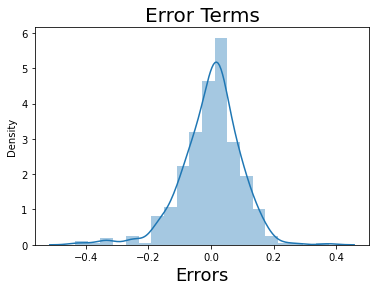

In [73]:
error = y_train - y_train_pred
sns.distplot((error), bins = 20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [74]:
# Error terms observed normally distributed.

In [75]:
#Step 5: Making Predictions

In [76]:
#Transform test data.
bbike_test[num_vars] = scaler.fit_transform(bbike_test[num_vars])
bbike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light-Snow,Mist-Cloudy,spring,summer,winter
184,0,1,0,0.837241,33.27085,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.911423,36.04875,0.470417,0.231142,0.725421,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.496221,22.85230,0.777843,0.443398,0.278853,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.890387,34.24915,0.236659,0.449707,0.545512,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.821739,32.19710,0.070765,0.682387,0.569148,0,0,...,0,0,1,0,0,0,0,0,1,0


In [77]:
bbike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light-Snow,Mist-Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,24.250312,0.508362,0.418803,0.517923,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.248645,8.281075,0.200875,0.187683,0.239498,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.000000,4.941955,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,17.090025,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,24.700000,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,31.124313,0.650989,0.523975,0.687956,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,41.318550,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
y_test = bbike_test.pop('count')
X_test = bbike_test

In [79]:
X_test = X_test[X_train_rfe_new.columns]

In [80]:
X_test

,year,workingday,temp,Sep,Sat,Light-Snow,Mist-Cloudy,spring,summer,winter
184,0,0,0.837241,0,0,0,1,0,0,0
535,1,1,0.911423,0,0,0,0,0,1,0
299,0,1,0.496221,0,0,0,1,0,0,1
221,0,1,0.890387,0,0,0,0,0,0,0
152,0,1,0.821739,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
702,1,1,0.503971,0,0,0,0,0,0,1
127,0,0,0.573725,0,0,0,0,0,1,0
640,1,1,0.745342,0,0,0,1,0,0,1
72,0,1,0.303855,0,0,0,0,1,0,0


In [81]:
# Prediction making
X_test = sm.add_constant(X_test)
y_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

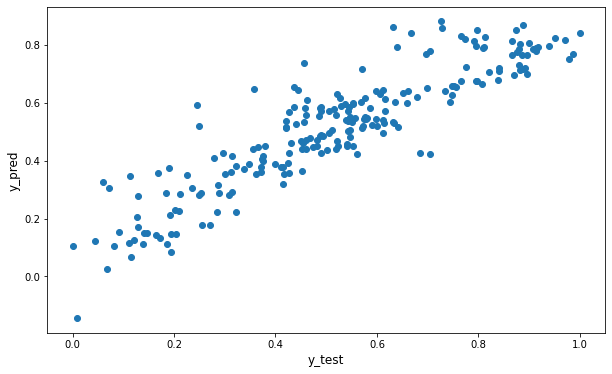

In [82]:
#Model Evaluation
fig = plt.figure()
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=15)             
plt.xlabel('y_test', fontsize=12)             
plt.ylabel('y_pred', fontsize=12)     

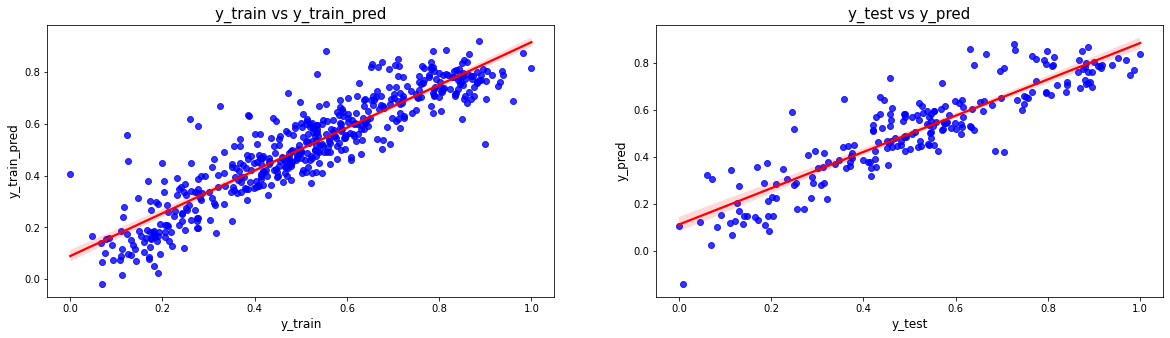

In [83]:
#Regression plot : Train vs Test Data Set
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.regplot(x=y_train, y=y_train_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_train vs y_train_pred', fontsize=15)              
plt.xlabel('y_train', fontsize=12)                         
plt.ylabel('y_train_pred', fontsize=12)                         


plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=15)              
plt.xlabel('y_test', fontsize=12)                         
plt.ylabel('y_pred', fontsize=12)                         
plt.show()

In [84]:
# Calculation of R2 for test set

In [85]:
r2_test = r2_score(y_test,y_pred)
print("Traning Set: R2 =",r2_train, "%",", ", "Test Set: R2 =", round(r2_test*100, 2),"%")

Traning Set: R2 = 82.6 % ,  Test Set: R2 = 80.8 %


In [86]:
# Adjusted R2 =1 - ((1-R2)(N-1))/(N-p-1)
adj_r2_test = 1-((1-r2_test)*(10-1))/(10-1-1)
print("Traning Set: Adjusted R2 =",adj_r2_train, "%",", ", "Test Set: Adjusted R2 =", round(adj_r2_test*100, 2),"%")

Traning Set: Adjusted R2 = 82.6 % ,  Test Set: Adjusted R2 = 78.4 %


In [87]:
#As per the Regresion Plot, R2 and Adjusted R2 compare between Training & Testing Data Set : Following is the Final Model
#'count' = 0.0902 + 0.2334x'year' + 0.0566x'workingday' + 0.4914x'temp' + 0.0916x'Sep'  + 0.0645x'Sat' - 0.3041x'Light Snow' - 0.0786x'Mist + Cloudy' - 0.0650x'spring' + 0.0527x'summer' + 0.0970x'winter'

In [88]:
#Conclusions:

# The variables 'year', 'workingday', 'temp', and months 'Sep'(Aoril to October Bike rental increases, with september at peak) , weekend on 'Sat', season time 'summer' & 'winter' have a positive impact on the count of bike rentals.
# The variables 'Light Snow','Mist + Cloudy','spring'  have a negative impact on the count of bike rentals.
# Hence, bike demand will be high in the 
#   - months of April to October especially when temperature is comfortable
#   - low wind speed , 
#   - low rain and snow as well as a misty or cloudy atmosphere. 
#   - winter than to summer.
#   - in the coming years